In [5]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>

In [33]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import seaborn as sns

np.random.seed(7)

pd.options.display.max_rows = 100

In [7]:
train_df = pd.read_csv('hw5/datasets/data_fraud/X_train.csv').sort_index(axis=1)
label = pd.read_csv('hw5/datasets/data_fraud/Y_train.csv')
data_df = pd.concat([train_df, label], axis=1)

In [8]:
test_df = pd.read_csv('hw5/datasets/data_fraud/X_test.csv').sort_index(axis=1)
test_df.head()

,amount,customerAttr_a,customerAttr_b,field_a,field_b,field_c,field_d,flag_a,flag_b,flag_c,flag_d,flag_e,hour_a,hour_b,indicator_a,indicator_b,state,total,zip
0,25.90,1234567890197185,redjhmbdzmbzg1226@sbcglobal.net,3,0,2525,8,0,1,0,0,2,0,0,0,0,CA,25.90,945
1,25.90,1234567890197186,puwelzumjynty@aol.com,0,0,3393,17,0,1,1,0,1,0,0,0,0,CA,25.90,940
2,49.95,1234567890197187,quhdenwubwydu@earthlink.net,3,1,-737,26,0,1,0,0,1,0,0,0,0,CA,49.95,910
3,59.40,1234567890197188,lrutfoamzuxjr00@comcast.net,3,0,-2799,23,0,1,0,0,1,0,0,0,0,WA,59.40,986
4,34.95,1234567890197189,zotfchxiqqdml4035@comcast.net,2,0,900,10,1,1,1,0,1,0,0,0,0,OR,34.95,973


In [9]:
train_df.describe()

,amount,customerAttr_a,field_a,field_b,field_c,field_d,flag_a,flag_b,flag_c,flag_d,flag_e,hour_a,hour_b,indicator_a,indicator_b,total,zip
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,26.976580,1.234568e+15,2.368270,0.405380,368.796390,15.026270,0.419710,0.556400,0.391400,0.013730,16.03735,14.016050,14.030530,0.113370,0.017850,26.976580,544.307340
std,14.595018,2.140113e+04,0.998768,0.490968,4151.204585,6.450308,0.493514,0.496811,0.488066,0.116368,191.19456,5.415115,5.409443,0.317046,0.132407,14.595018,317.286574
min,0.000000,1.234568e+15,0.000000,0.000000,-26803.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,12.950000,1.234568e+15,2.000000,0.000000,-2260.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.00000,11.000000,11.000000,0.000000,0.000000,12.950000,279.000000
50%,25.900000,1.234568e+15,3.000000,0.000000,1093.000000,15.000000,0.000000,1.000000,0.000000,0.000000,1.00000,14.000000,14.000000,0.000000,0.000000,25.900000,535.000000
75%,38.850000,1.234568e+15,3.000000,1.000000,3517.250000,20.000000,1.000000,1.000000,1.000000,0.000000,1.00000,18.000000,18.000000,0.000000,0.000000,38.850000,891.000000
max,59.950000,1.234568e+15,4.000000,1.000000,8169.000000,44.000000,1.000000,1.000000,1.000000,1.000000,3278.00000,23.000000,23.000000,1.000000,1.000000,59.950000,999.000000


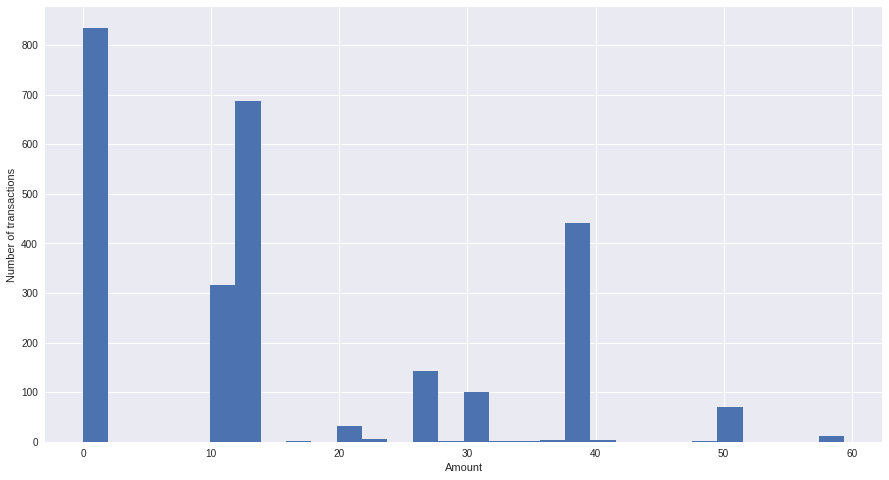

In [10]:
figure = plt.figure(figsize=(15, 8))
plt.hist(data_df[data_df['fraud'] == 1]['amount'], bins=30)
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.legend()

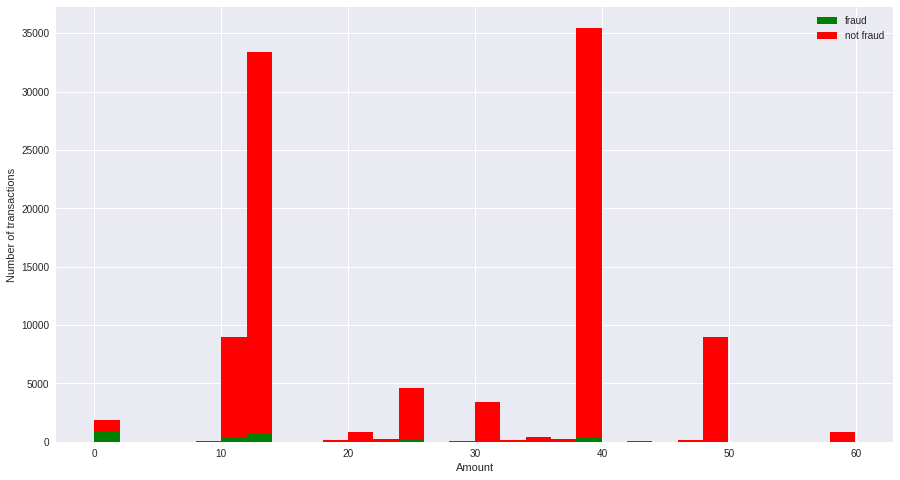

In [11]:
figure = plt.figure(figsize=(15, 8))
plt.hist([data_df[data_df['fraud'] == 1]['amount'], data_df[data_df['fraud'] == 0]['amount']], stacked=True,
         color=['g', 'r'], bins=30, label=['fraud', 'not fraud'])
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.legend()

In [13]:
combined_df = train_df.append(test_df)
combined_df.reset_index(inplace=True)
combined_df.drop('index', inplace=True, axis=1)

In [14]:
def check_isnull(dataframe, columns):
    df = pd.isnull(dataframe)

    for column in columns:
        if len(df.groupby(column).size()) == 1:
            yield {column: False}
        else:
            yield {column: True}

# check missing values in train data
for col in check_isnull(combined_df, ['amount', 'zip', 'state', 'total', 'customerAttr_a', 'customerAttr_b', 'field_a',
                                   'field_b', 'field_c', 'field_d', 'hour_a', 'hour_b', 'flag_a', 'flag_b', 'flag_c',
                                   'flag_d', 'flag_e', 'indicator_a', 'indicator_b']):
    print(col)

{'amount': False}
{'zip': False}
{'state': True}
{'total': False}
{'customerAttr_a': False}
{'customerAttr_b': False}
{'field_a': False}
{'field_b': False}
{'field_c': False}
{'field_d': False}
{'hour_a': False}
{'hour_b': False}
{'flag_a': False}
{'flag_b': False}
{'flag_c': False}
{'flag_d': False}
{'flag_e': False}
{'indicator_a': False}
{'indicator_b': False}


In [15]:
# impute missing value with the most frequent state
combined_df['state'] = combined_df['state'].fillna('CA')

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
amount            150000 non-null float64
customerAttr_a    150000 non-null int64
customerAttr_b    150000 non-null object
field_a           150000 non-null int64
field_b           150000 non-null int64
field_c           150000 non-null int64
field_d           150000 non-null int64
flag_a            150000 non-null int64
flag_b            150000 non-null int64
flag_c            150000 non-null int64
flag_d            150000 non-null int64
flag_e            150000 non-null int64
hour_a            150000 non-null int64
hour_b            150000 non-null int64
indicator_a       150000 non-null int64
indicator_b       150000 non-null int64
state             150000 non-null object
total             150000 non-null float64
zip               150000 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 21.7+ MB


In [17]:
def process_state(combined):
    state_dummies = pd.get_dummies(combined['state'], prefix="state")
    combined = pd.concat([combined, state_dummies], axis=1)
    # removing "Pclass"
    combined.drop('state', axis=1, inplace=True)
    return combined

combined_df = process_state(combined_df)

In [18]:
combined_df.drop('customerAttr_b', axis=1, inplace=True)

In [19]:
def recover_train_test(combined):
    train = combined.ix[0:train_df.shape[0]-1]
    test = combined.ix[train_df.shape[0]:]

    return train, test

train_df, test_df = recover_train_test(combined_df)

In [24]:
from sklearn.metrics import classification_report, precision_score, recall_score


def describe(target_true, target_pred):
    report = classification_report(target_true, target_pred)
    print()
    print('classification report')
    print(report)
    precision = precision_score(target_true, target_pred)
    print('precision score')
    print(precision)
    recall = recall_score(target_true, target_pred)
    print('recall score')
    print(recall)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [131]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators': [200, 210, 240, 250],
    'criterion': ['gini', 'entropy']
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_df, label.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.97888
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 210}


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, label, test_size=0.3)

forest = RandomForestClassifier(max_features='sqrt', max_depth=8, n_estimators=210, class_weight={0: 1., 1: 20})
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
describe(y_test, y_pred)


classification report
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     29203
          1       0.52      0.39      0.45       797

avg / total       0.97      0.97      0.97     30000

precision score
0.521812080537
recall score
0.390213299875


In [47]:
import math
from sklearn.utils import shuffle


def split_abundant_target(data_df, ratio):
    data_df = shuffle(data_df)
    part_size = math.ceil(data_df.shape[0] / ratio)
    for i in range(0, ratio):
        yield data_df[i * part_size:min((i + 1) * part_size, data_df.shape[0])]

        
def data_target(data, target_name):
    data = data.astype('float32')
    target = data[target_name]
    data = data.drop(target_name, axis=1)
    return data, target

In [51]:
data_df = pd.concat([train_df, label], axis=1)

one_df = data_df[data_df['fraud'] == 1]
zero_df = data_df[data_df['fraud'] == 0]
class_ratio = round(zero_df.shape[0] / one_df.shape[0]) // 6
class_ratio

for zero_df in split_abundant_target(zero_df, class_ratio):
    data, target = data_target(pd.concat([one_df, zero_df]), 'fraud')

    X_train, X_test, y_train, y_test = train_test_split(train_df, label, test_size=0.3)

    forest = RandomForestClassifier(max_features='sqrt', max_depth=8, n_estimators=210)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    describe(y_test, y_pred)


classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29217
          1       0.84      0.27      0.41       783

avg / total       0.98      0.98      0.97     30000

precision score
0.844621513944
recall score
0.270753512133



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29210
          1       0.82      0.27      0.41       790

avg / total       0.98      0.98      0.97     30000

precision score
0.819923371648
recall score
0.270886075949



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29228
          1       0.81      0.26      0.39       772

avg / total       0.98      0.98      0.97     30000

precision score
0.811475409836
recall score
0.256476683938
